The MIT License (MIT)<br>
Copyright (c) 2017 Massachusetts Institute of Technology

Author: Evan Wojciechowski, Cody Rude, and Victor Pankratius<br>
This software is part of the NASA and NSF Projects (PI: V. Pankratius)

Permission is hereby granted, free of charge, to any person obtaining a copy<br>
of this software and associated documentation files (the "Software"), to deal<br>
in the Software without restriction, including without limitation the rights<br>
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell<br>
copies of the Software, and to permit persons to whom the Software is<br>
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in<br>
all copies or substantial portions of the Software.<br>
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR<br>
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,<br>
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE<br>
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER<br>
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,<br>
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN<br>
THE SOFTWARE.
<hr>

# Visualizing Different Signal Decomposition Methods
## Example Time Series from Akutan Volcano

This is a demonstration of how to use exploratory visualization in Scikit Discovery. It shows how to make the fourier, emperical mode decomposition, wavelets, and linear decomposition plots. Time series data is obtained from the Plate Boundary Observatory, and two GPS station deployed on the Akutan Volcano to measure surface deformation with millimeter accuracy.

In [1]:
from skdiscovery.exploratory.visualization import fourier_plot, emd_plot, wavelets_plot, linear_decomposition_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 16, 9

In [2]:
from skdaccess.framework.param_class import *
from skdaccess.astro.kepler import DataFetcher as Kepler_DF
from skdaccess.utilities.kepler_util import normalize
from skdiscovery.utilities.trendTools import medianFilter

In [3]:
from skdaccess.geo.pbo import DataFetcher as PBO_DF

In [4]:
# Latitude and Longitude range around Akutan Volcano
lat_range = AutoList((53.9,54.35))
lon_range = AutoList((-166.1, -165.5))
start_time = '2006-01-01'
end_time = '2015-06-01'

akutan_DF = PBO_DF(start_time, end_time, [lat_range, lon_range],mdyratio=.5)
akutan_data     = akutan_DF.output().get()

100%|██████████| 8/8 [00:00<00:00, 17.65it/s]


In [5]:
akudE0607 = akutan_data['AV06']['dE'] - akutan_data['AV07']['dE']

Full time series data for Akutan Volcano. Computed the differences between the eastward movements of GPS stations AV06 and AV07

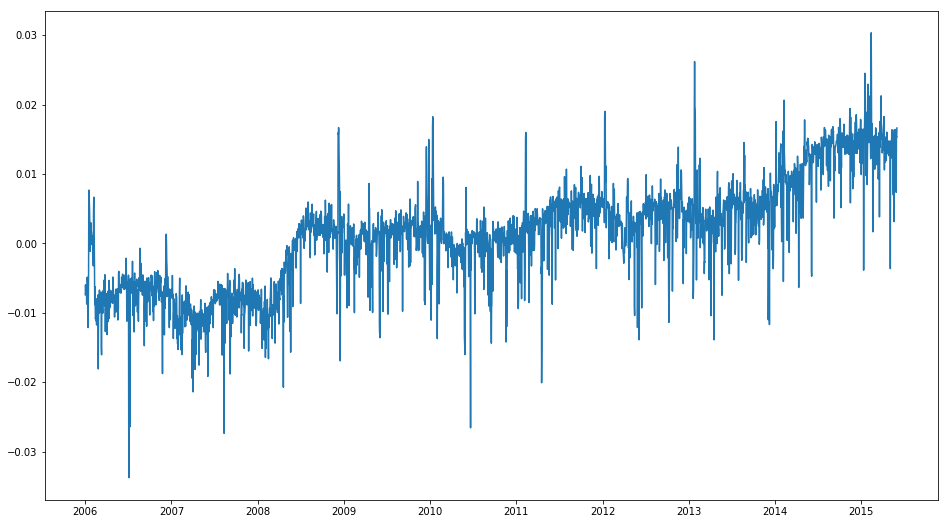

In [6]:
akuS = 'Akutan dE [meters]'

plt.plot(akudE0607);


Fourier decomposition of the time series.

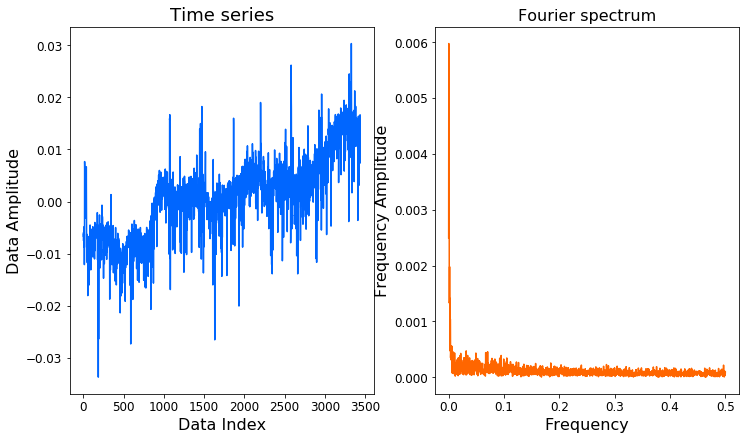

In [7]:
fourier_plot.run_plotDFT(akudE0607);

Full intrinsinc mode decomposition for Akutan event

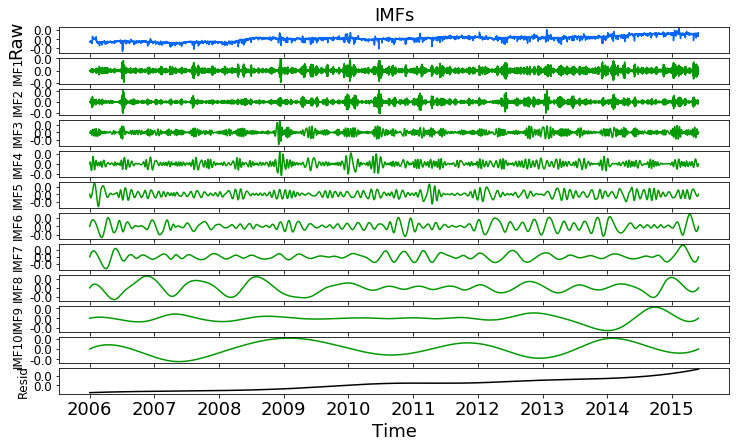

In [8]:
emd_plot.run_plotImfs(akudE0607);

Compare original signal with different combined components

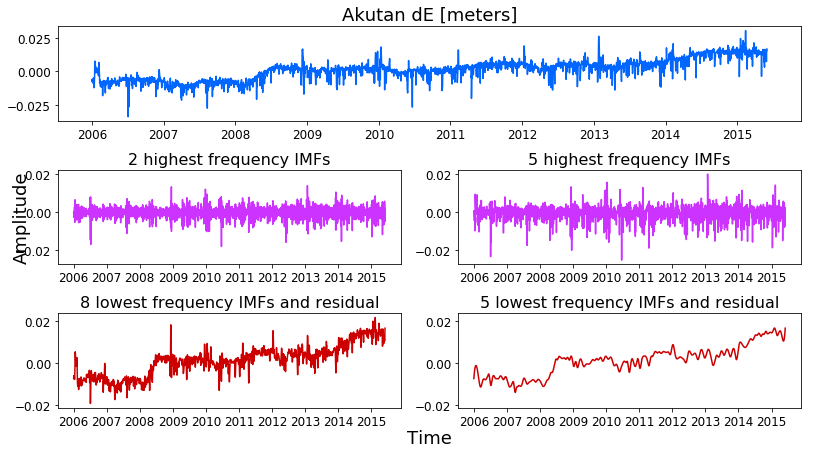

In [9]:
akuSplit25 = emd_plot.run_plotImfsSplitComp(akudE0607, highNums = [2, 5], mainTitle = akuS)

Linear interpolation to 5 lowest frequency IMFs and residual

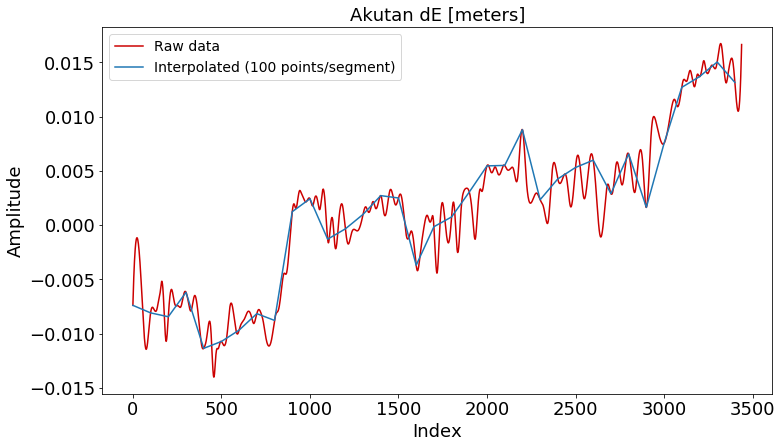

In [10]:
akuLow5 = akuSplit25[3]
akuLow5Lin = linear_decomposition_plot.plot_lin_interp(akuLow5, mainTitle = akuS)

Combined bottom 5 IMFs (top), linear decomposition (middle), and slopes (bottom)

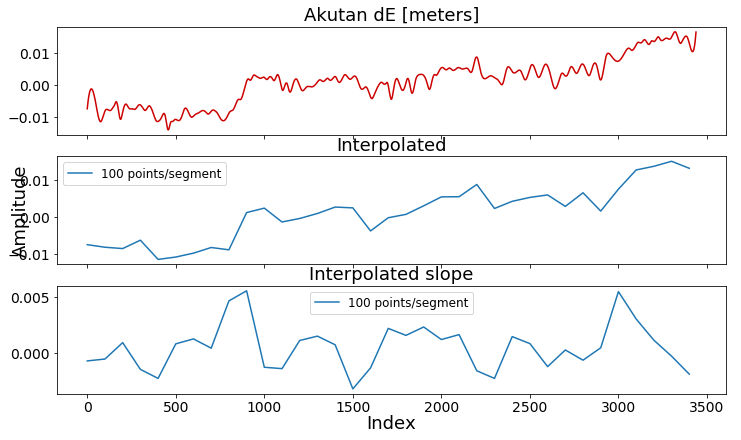

In [11]:
akuLow5Slopes = linear_decomposition_plot.plot_lin_slope(akuLow5, mainTitle = akuS)

Different wavelet components on top of original signal (top), Individual wavelet components (middle),
and original signal with 8 node wavelet reconstruction (bottom)

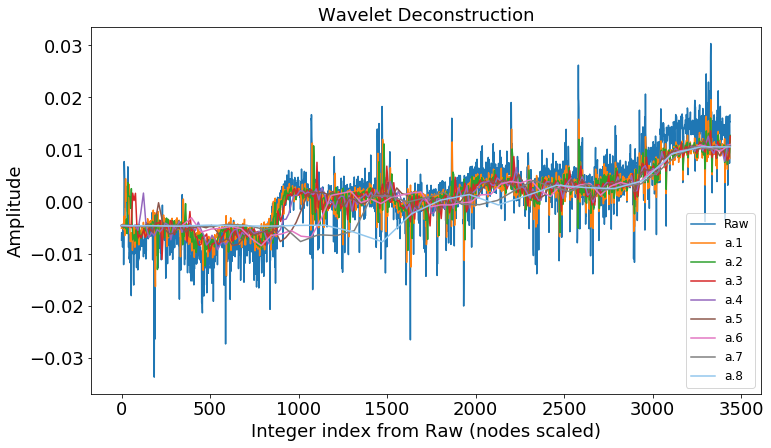

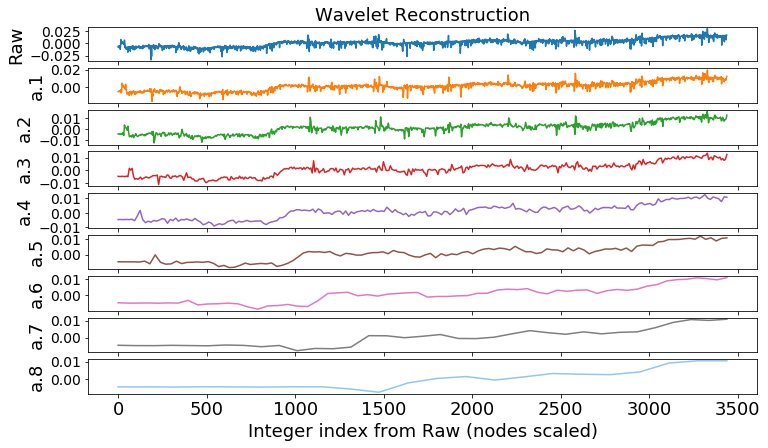

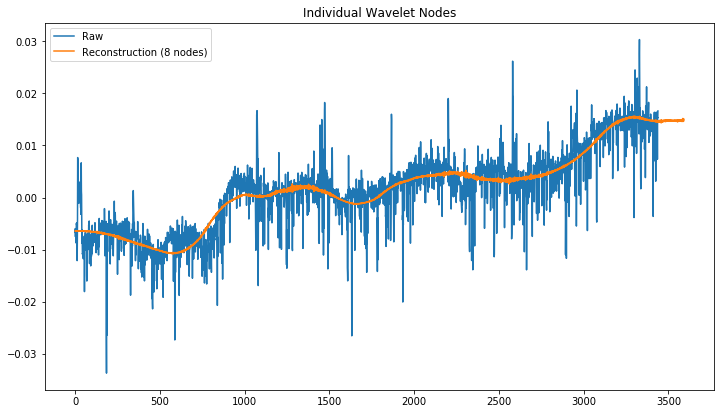

In [12]:
wavelets_plot.run_plotWPDecon(akudE0607, wavelet = 'db5')
wavelets_plot.run_plotWPShowall(akudE0607, wavelet = 'db5')
wavelets_plot.run_plotWPRecon(akudE0607, wavelet = 'db5')